**Dataset Checking and Basic Information**

In [ ]:
import pandas as pd

# specify the file path of the xlsx file
file_path = "/content/Raw material.xlsx"

# read the xlsx file as a dataframe
df = pd.read_excel(file_path)
print(df.isnull().sum())
print("____________________________________________________________")
df.describe()
print("____________________________________________________________")
df.info()

Gender            0
Married           0
Age               0
Qualifications    0
experience        0
                 ..
Behavior9         0
Interview1        0
Interview2        0
Offer1            0
Offer2            0
Length: 93, dtype: int64
____________________________________________________________
____________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 93 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           773 non-null    int64
 1   Married          773 non-null    int64
 2   Age              773 non-null    int64
 3   Qualifications   773 non-null    int64
 4   experience       773 non-null    int64
 5   Honesty1         773 non-null    int64
 6   Honesty2         773 non-null    int64
 7   Honesty3         773 non-null    int64
 8   Honesty4         773 non-null    int64
 9   Honesty5         773 non-null    int64


**A.I. MODEL USING FEATURE SELECTION INCLUDING ACCURACY REPORT**



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report

import pandas as pd

# specify the file path of the xlsx file
file_path = "/content/Raw material.xlsx"

# read the xlsx file as a dataframe
df = pd.read_excel(file_path)

# drop the unwanted columns
df = df.drop(['Honesty1', 'Honesty2', 'Honesty3', 'Honesty4', 'Honesty5', 'Honesty6', 'Honesty7', 'Honesty8', 'Honesty9', 
              'Emotion1', 'Emotion2', 'Emotion3', 'Emotion4', 'Emotion5', 'Emotion6', 'Emotion8', 'Emotion10', 
              'Extraver2', 'Extraver3', 'Extraver4', 'Extraver5', 'Extraver6', 'Extraver7', 'Extraver8', 'Extraver9', 'Extraver10', 
              'Agreeable1', 'Agreeable3', 'Agreeable4', 'Agreeable5', 'Agreeable7', 'Agreeable8', 'Agreeable9', 'Agreeable10', 
              'Conscientious1', 'Conscientious3', 'Conscientious4', 'Conscientious6', 'Conscientious7', 'Conscientious8', 'Conscientious9', 'Conscientious10', 
              'Openness1', 'Openness2', 'Openness3', 'Openness5', 'Openness7', 'Openness8', 'Openness9', 'Openness10',
              'Clarity1', 'Clarity2', 'Clarity3', 'Clarity4', 
              'Size1', 'Size2', 'Size3', 'Size4', 
              'Strength1', 'Strength2', 'Strength3', 
              'Comfort1', 'Comfort2', 'Comfort3', 'Comfort5', 'Comfort6', 'Comfort8', 
              'Proactive1', 'Proactive3', 'Proactive4', 'Proactive5', 'Proactive6', 'Proactive7', 'Proactive8', 'Proactive9', 'Proactive10', 
              'Behavior1', 'Behavior2', 'Behavior3', 'Behavior5', 'Behavior7', 'Behavior8', 'Behavior9', 
              'Interview1', 'Interview2', 
              'Offer1', 'Offer2', 'Aoffer'], axis=1)

X = df.drop(columns=['Classification'])
y = df['Classification']

# Perform feature selection using SelectKBest with chi-squared test
selector = SelectKBest(chi2, k=6)
X_new = selector.fit_transform(X, y)

# Display the selected features and their ranking
feature_scores = zip(X.columns, selector.scores_)
feature_scores = sorted(feature_scores, key=lambda x: x[1], reverse=True)
print("Selected Features:")
for feature, score in feature_scores[:3]:
    print("\t{}, Score: {}".format(feature, score))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3)

# Define the hyperparameters to search over
param_grid = {
    'max_depth': [5, 6, 8],
    'min_samples_split': [2, 4, 6],
    'criterion': ['gini', 'entropy']
}

# Train a Decision Tree classifier using the selected features
model = DecisionTreeClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
model.fit(X_train, y_train)

# Train a Random Forest classifier using the selected features
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Calculate the accuracy of the model
score = accuracy_score(y_test, predictions)
print("Accuracy:", score)

# Calculate precision, recall and F1 score
report = classification_report(y_test, predictions)
print("Classification Report:\n", report)

Selected Features:
	Ainterview, Score: 6.542668865350768
	Acomfort, Score: 3.240859085275417
	AHonesty, Score: 3.128846814654461
Accuracy: 0.7887931034482759
Classification Report:
               precision    recall  f1-score   support

        High       0.43      0.27      0.33        45
         Low       0.84      0.91      0.87       187

    accuracy                           0.79       232
   macro avg       0.63      0.59      0.60       232
weighted avg       0.76      0.79      0.77       232



**A.I. MODEL WITHOUT USING FEATURE SELECTION**


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# specify the file path of the downloaded dataset file
file_path = "/content/Raw material.xlsx"

# read the xlsx file as a dataframe
df = pd.read_excel(file_path)

# drop the unwanted columns
df = df.drop(['Honesty1', 'Honesty2', 'Honesty3', 'Honesty4', 'Honesty5', 'Honesty6', 'Honesty7', 'Honesty8', 'Honesty9', 
              'Emotion1', 'Emotion2', 'Emotion3', 'Emotion4', 'Emotion5', 'Emotion6', 'Emotion8', 'Emotion10', 
              'Extraver2', 'Extraver3', 'Extraver4', 'Extraver5', 'Extraver6', 'Extraver7', 'Extraver8', 'Extraver9', 'Extraver10', 
              'Agreeable1', 'Agreeable3', 'Agreeable4', 'Agreeable5', 'Agreeable7', 'Agreeable8', 'Agreeable9', 'Agreeable10', 
              'Conscientious1', 'Conscientious3', 'Conscientious4', 'Conscientious6', 'Conscientious7', 'Conscientious8', 'Conscientious9', 'Conscientious10', 
              'Openness1', 'Openness2', 'Openness3', 'Openness5', 'Openness7', 'Openness8', 'Openness9', 'Openness10',
              'Clarity1', 'Clarity2', 'Clarity3', 'Clarity4', 
              'Size1', 'Size2', 'Size3', 'Size4', 
              'Strength1', 'Strength2', 'Strength3', 
              'Comfort1', 'Comfort2', 'Comfort3', 'Comfort5', 'Comfort6', 'Comfort8', 
              'Proactive1', 'Proactive3', 'Proactive4', 'Proactive5', 'Proactive6', 'Proactive7', 'Proactive8', 'Proactive9', 'Proactive10', 
              'Behavior1', 'Behavior2', 'Behavior3', 'Behavior5', 'Behavior7', 'Behavior8', 'Behavior9', 
              'Interview1', 'Interview2', 
              'Offer1', 'Offer2', 'Aoffer'], axis=1)

#print the dataset columns
print(df.columns.tolist())

# split the dataset into training and testing sets
X = df.drop(columns=['Classification'])
y = df['Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# train the decision tree classifier model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# make predictions on the testing set
predictions = model.predict(X_test)

# calculate the accuracy score of the model
score = accuracy_score(y_test, predictions)
print("Accuracy score:", score)

['Gender', 'Married', 'Age', 'Qualifications', 'experience', 'AHonesty', 'AEmotion', 'Aextravert', 'Aagreeable', 'Aconscientious', 'Aopenness', 'Aclarity', 'Asize', 'Astrength', 'Acomfort', 'Aproactive', 'Abehavior', 'Ainterview', 'Classification']
Accuracy score: 0.632258064516129


HEATMAP MATRIX CORRELATION (ALL FEATURES)

<ipython-input-3-800bc4399ffc>:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


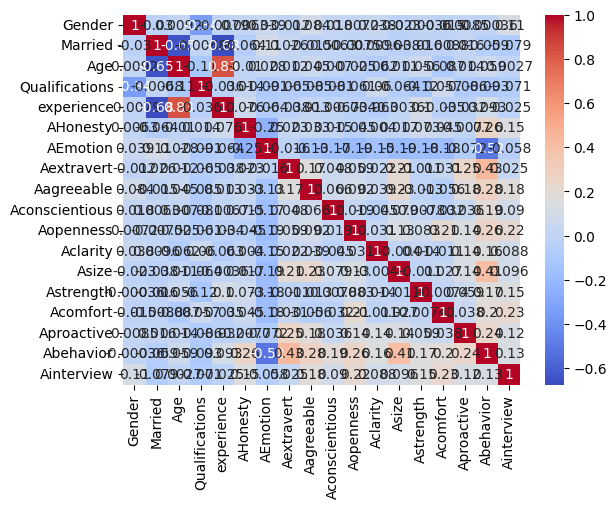

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read the dataset into a dataframe
df = pd.read_excel('/content/Raw material.xlsx')

# drop the unwanted columns
df = df.drop(['Honesty1', 'Honesty2', 'Honesty3', 'Honesty4', 'Honesty5', 'Honesty6', 'Honesty7', 'Honesty8', 'Honesty9', 
              'Emotion1', 'Emotion2', 'Emotion3', 'Emotion4', 'Emotion5', 'Emotion6', 'Emotion8', 'Emotion10', 
              'Extraver2', 'Extraver3', 'Extraver4', 'Extraver5', 'Extraver6', 'Extraver7', 'Extraver8', 'Extraver9', 'Extraver10', 
              'Agreeable1', 'Agreeable3', 'Agreeable4', 'Agreeable5', 'Agreeable7', 'Agreeable8', 'Agreeable9', 'Agreeable10', 
              'Conscientious1', 'Conscientious3', 'Conscientious4', 'Conscientious6', 'Conscientious7', 'Conscientious8', 'Conscientious9', 'Conscientious10', 
              'Openness1', 'Openness2', 'Openness3', 'Openness5', 'Openness7', 'Openness8', 'Openness9', 'Openness10',
              'Clarity1', 'Clarity2', 'Clarity3', 'Clarity4', 
              'Size1', 'Size2', 'Size3', 'Size4', 
              'Strength1', 'Strength2', 'Strength3', 
              'Comfort1', 'Comfort2', 'Comfort3', 'Comfort5', 'Comfort6', 'Comfort8', 
              'Proactive1', 'Proactive3', 'Proactive4', 'Proactive5', 'Proactive6', 'Proactive7', 'Proactive8', 'Proactive9', 'Proactive10', 
              'Behavior1', 'Behavior2', 'Behavior3', 'Behavior5', 'Behavior7', 'Behavior8', 'Behavior9', 
              'Interview1', 'Interview2', 
              'Offer1', 'Offer2', 'Aoffer', 'Aoffer'], axis=1)

# create a correlation matrix
corr_matrix = df.corr()

# create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# show the plot
plt.show()

SCATTER PLOT MATRIX (ALL FEATURES)

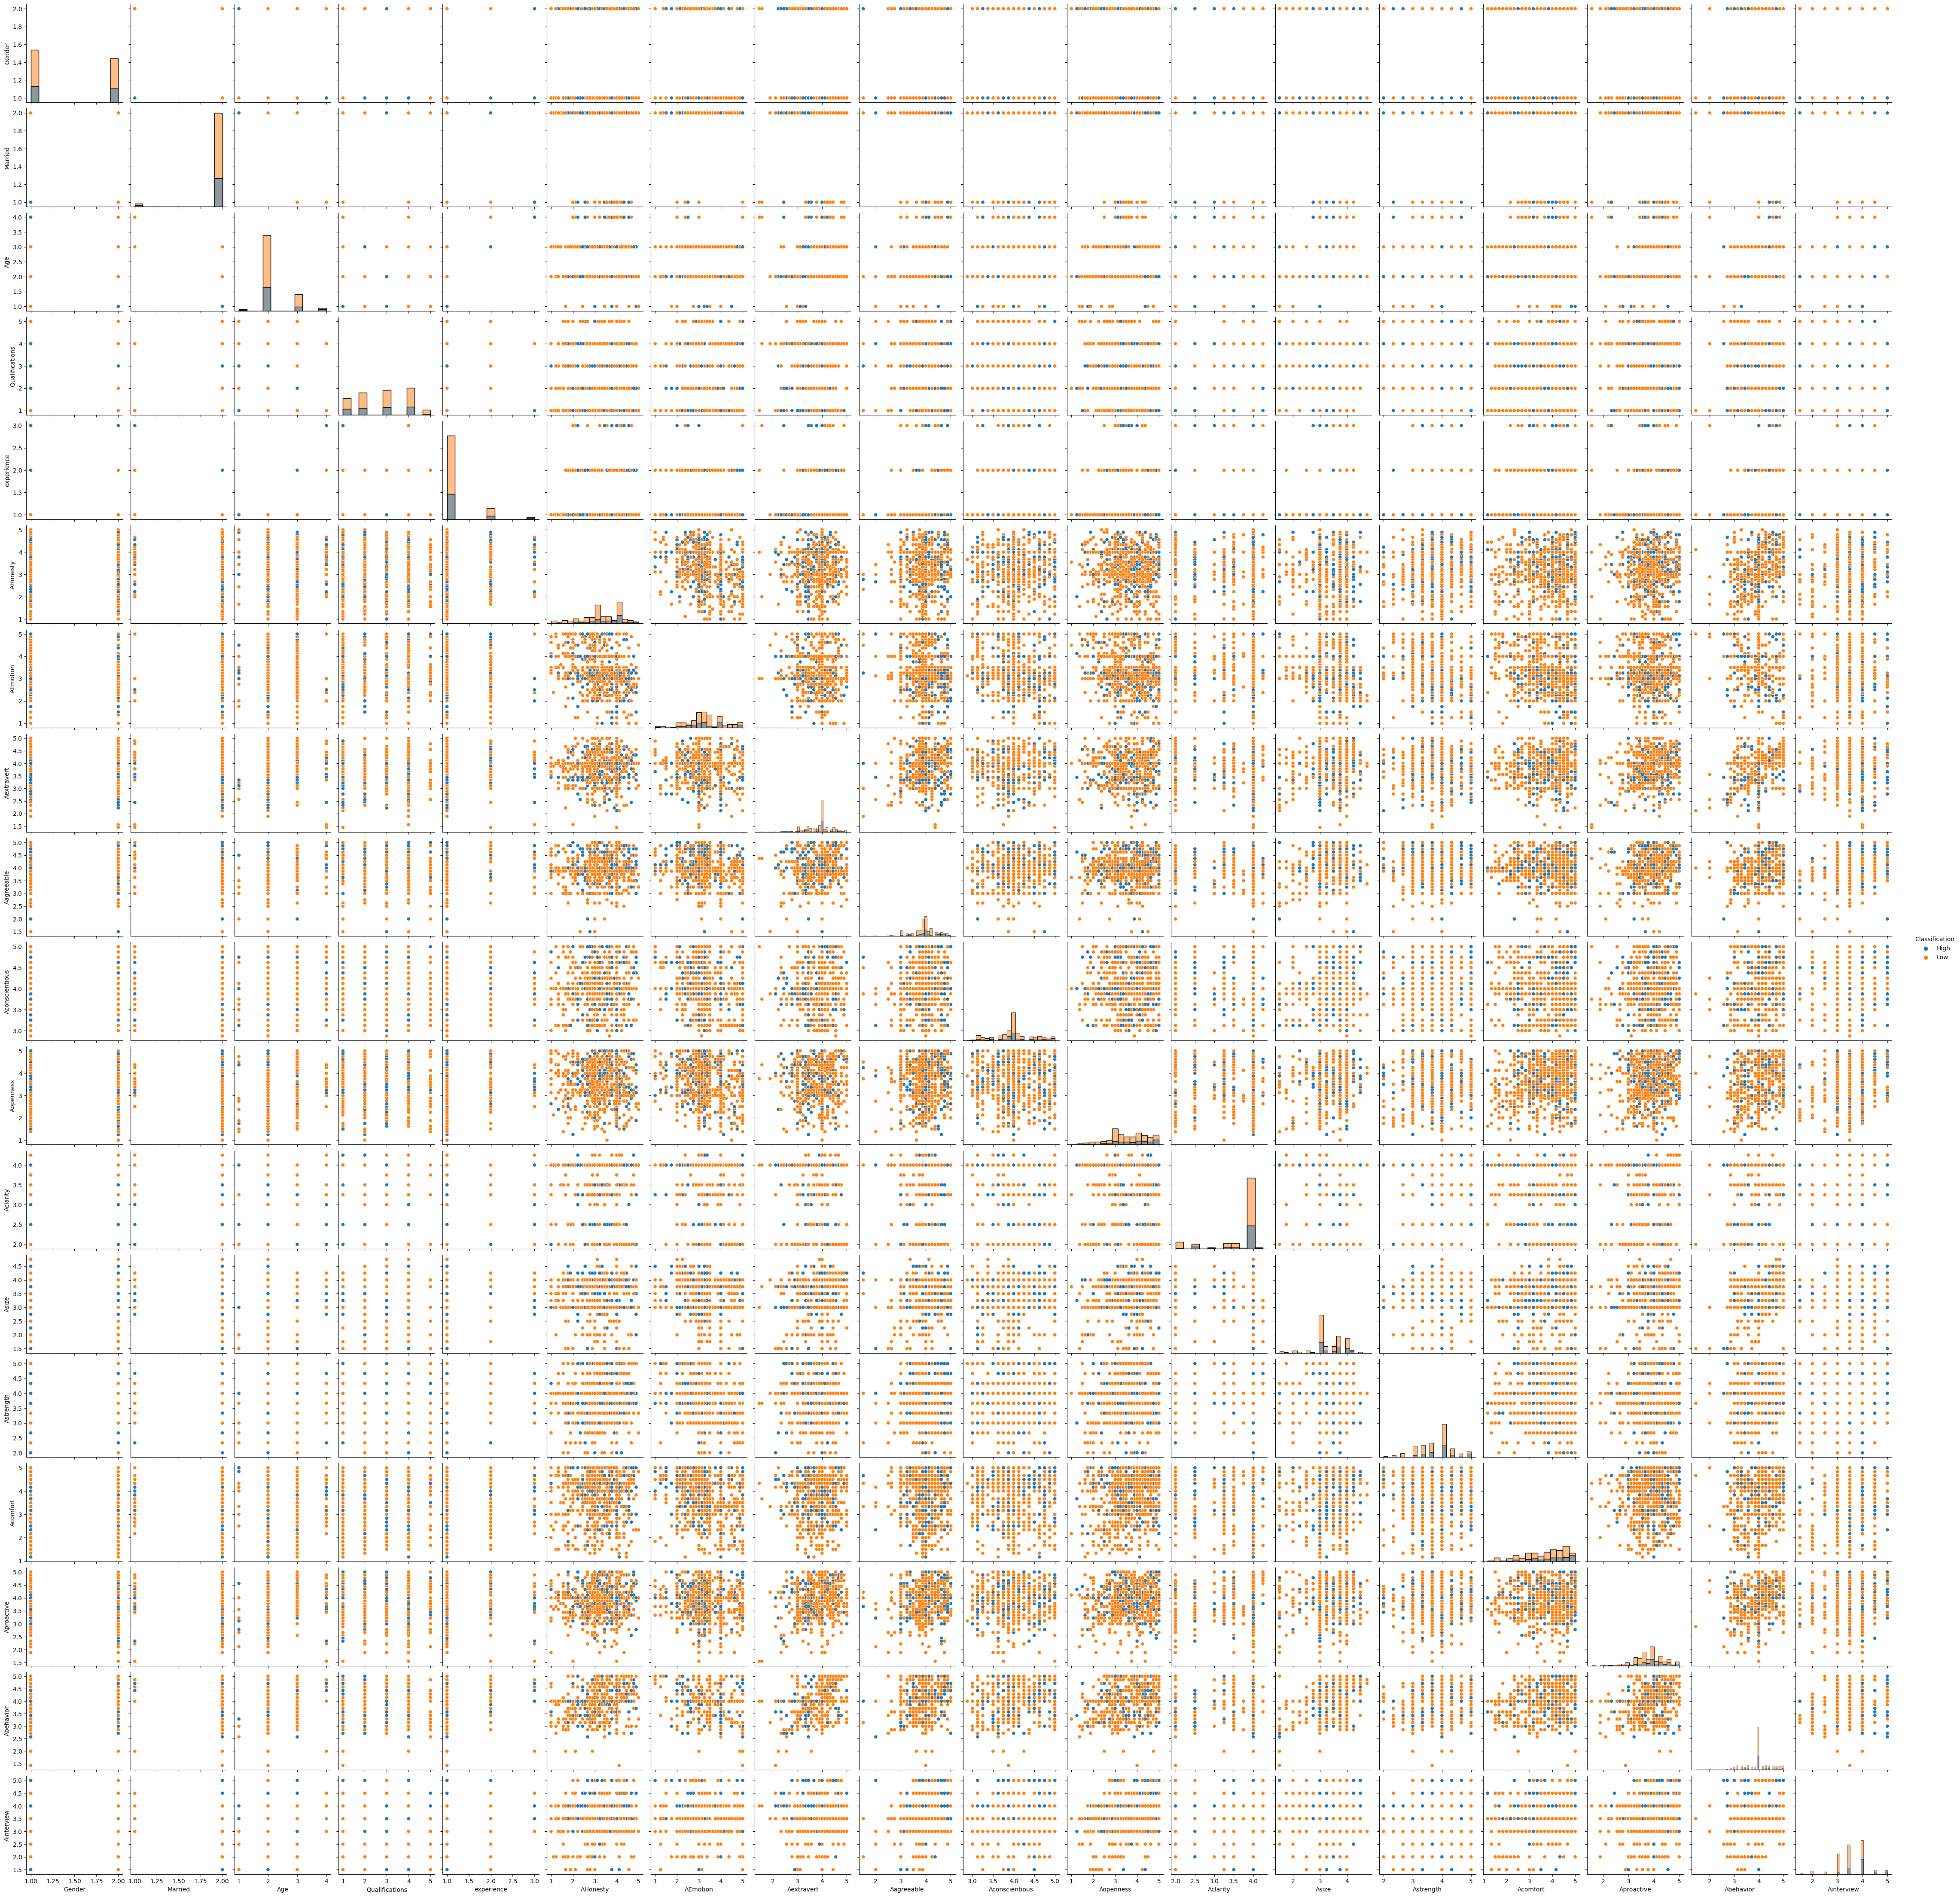

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# dataset into a dataframe
df = pd.read_excel('/content/Raw material.xlsx')

# drop the unwanted columns
df = df.drop(['Honesty1', 'Honesty2', 'Honesty3', 'Honesty4', 'Honesty5', 'Honesty6', 'Honesty7', 'Honesty8', 'Honesty9', 
              'Emotion1', 'Emotion2', 'Emotion3', 'Emotion4', 'Emotion5', 'Emotion6', 'Emotion8', 'Emotion10', 
              'Extraver2', 'Extraver3', 'Extraver4', 'Extraver5', 'Extraver6', 'Extraver7', 'Extraver8', 'Extraver9', 'Extraver10', 
              'Agreeable1', 'Agreeable3', 'Agreeable4', 'Agreeable5', 'Agreeable7', 'Agreeable8', 'Agreeable9', 'Agreeable10', 
              'Conscientious1', 'Conscientious3', 'Conscientious4', 'Conscientious6', 'Conscientious7', 'Conscientious8', 'Conscientious9', 'Conscientious10', 
              'Openness1', 'Openness2', 'Openness3', 'Openness5', 'Openness7', 'Openness8', 'Openness9', 'Openness10',
              'Clarity1', 'Clarity2', 'Clarity3', 'Clarity4', 
              'Size1', 'Size2', 'Size3', 'Size4', 
              'Strength1', 'Strength2', 'Strength3', 
              'Comfort1', 'Comfort2', 'Comfort3', 'Comfort5', 'Comfort6', 'Comfort8', 
              'Proactive1', 'Proactive3', 'Proactive4', 'Proactive5', 'Proactive6', 'Proactive7', 'Proactive8', 'Proactive9', 'Proactive10', 
              'Behavior1', 'Behavior2', 'Behavior3', 'Behavior5', 'Behavior7', 'Behavior8', 'Behavior9', 
              'Interview1', 'Interview2', 
              'Offer1', 'Offer2', 'Aoffer'], axis=1)

# create a scatter plot matrix
sns.pairplot(df, hue='Classification', diag_kind='hist')

# show the plot
plt.show()


FEATURE RANKING : permutation_importance

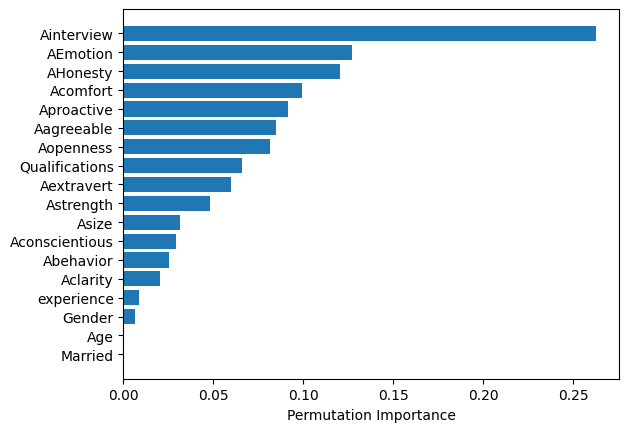

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance

# specify the file path of the downloaded dataset file
file_path = "/content/Raw material.xlsx"

# read the xlsx file as a dataframe
df = pd.read_excel(file_path)

# drop the unwanted columns
df = df.drop(['Honesty1', 'Honesty2', 'Honesty3', 'Honesty4', 'Honesty5', 'Honesty6', 'Honesty7', 'Honesty8', 'Honesty9', 
              'Emotion1', 'Emotion2', 'Emotion3', 'Emotion4', 'Emotion5', 'Emotion6', 'Emotion8', 'Emotion10', 
              'Extraver2', 'Extraver3', 'Extraver4', 'Extraver5', 'Extraver6', 'Extraver7', 'Extraver8', 'Extraver9', 'Extraver10', 
              'Agreeable1', 'Agreeable3', 'Agreeable4', 'Agreeable5', 'Agreeable7', 'Agreeable8', 'Agreeable9', 'Agreeable10', 
              'Conscientious1', 'Conscientious3', 'Conscientious4', 'Conscientious6', 'Conscientious7', 'Conscientious8', 'Conscientious9', 'Conscientious10', 
              'Openness1', 'Openness2', 'Openness3', 'Openness5', 'Openness7', 'Openness8', 'Openness9', 'Openness10',
              'Clarity1', 'Clarity2', 'Clarity3', 'Clarity4', 
              'Size1', 'Size2', 'Size3', 'Size4', 
              'Strength1', 'Strength2', 'Strength3', 
              'Comfort1', 'Comfort2', 'Comfort3', 'Comfort5', 'Comfort6', 'Comfort8', 
              'Proactive1', 'Proactive3', 'Proactive4', 'Proactive5', 'Proactive6', 'Proactive7', 'Proactive8', 'Proactive9', 'Proactive10', 
              'Behavior1', 'Behavior2', 'Behavior3', 'Behavior5', 'Behavior7', 'Behavior8', 'Behavior9', 
              'Interview1', 'Interview2', 
              'Offer1', 'Offer2', 'Aoffer'], axis=1)

# perform feature ranking using permutation importance
X = df.drop(columns=['Classification'])
y = df['Classification']
model = DecisionTreeClassifier()
model.fit(X, y)
result = permutation_importance(model, X, y, n_repeats=10, random_state=0)
importance = result.importances_mean
feature_names = X.columns
sorted_idx = importance.argsort()
plt.barh(feature_names[sorted_idx], importance[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()


FEATURE RANKING : feature selection

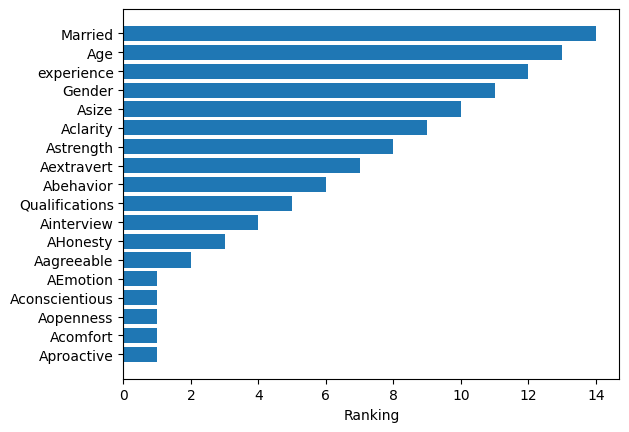

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

# specify the file path of the downloaded dataset file
file_path = "/content/Raw material.xlsx"

# read the xlsx file as a dataframe
df = pd.read_excel(file_path)

# drop the unwanted columns
df = df.drop(['Honesty1', 'Honesty2', 'Honesty3', 'Honesty4', 'Honesty5', 'Honesty6', 'Honesty7', 'Honesty8', 'Honesty9', 
              'Emotion1', 'Emotion2', 'Emotion3', 'Emotion4', 'Emotion5', 'Emotion6', 'Emotion8', 'Emotion10', 
              'Extraver2', 'Extraver3', 'Extraver4', 'Extraver5', 'Extraver6', 'Extraver7', 'Extraver8', 'Extraver9', 'Extraver10', 
              'Agreeable1', 'Agreeable3', 'Agreeable4', 'Agreeable5', 'Agreeable7', 'Agreeable8', 'Agreeable9', 'Agreeable10', 
              'Conscientious1', 'Conscientious3', 'Conscientious4', 'Conscientious6', 'Conscientious7', 'Conscientious8', 'Conscientious9', 'Conscientious10', 
              'Openness1', 'Openness2', 'Openness3', 'Openness5', 'Openness7', 'Openness8', 'Openness9', 'Openness10',
              'Clarity1', 'Clarity2', 'Clarity3', 'Clarity4', 
              'Size1', 'Size2', 'Size3', 'Size4', 
              'Strength1', 'Strength2', 'Strength3', 
              'Comfort1', 'Comfort2', 'Comfort3', 'Comfort5', 'Comfort6', 'Comfort8', 
              'Proactive1', 'Proactive3', 'Proactive4', 'Proactive5', 'Proactive6', 'Proactive7', 'Proactive8', 'Proactive9', 'Proactive10', 
              'Behavior1', 'Behavior2', 'Behavior3', 'Behavior5', 'Behavior7', 'Behavior8', 'Behavior9', 
              'Interview1', 'Interview2', 
              'Offer1', 'Offer2', 'Aoffer'], axis=1)

# perform feature ranking using RFE
X = df.drop(columns=['Classification'])
y = df['Classification']
model = DecisionTreeClassifier()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)
importance = rfe.ranking_
feature_names = X.columns
sorted_idx = importance.argsort()
plt.barh(feature_names[sorted_idx], importance[sorted_idx])
plt.xlabel("Ranking")
plt.show()


COMPARISON (all features vs top 5 features)

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# specify the file path of the downloaded dataset file
file_path = "/content/Raw material.xlsx"

# read the xlsx file as a dataframe
df = pd.read_excel(file_path)

# drop the unwanted columns
df = df.drop(['Honesty1', 'Honesty2', 'Honesty3', 'Honesty4', 'Honesty5', 'Honesty6', 'Honesty7', 'Honesty8', 'Honesty9', 
              'Emotion1', 'Emotion2', 'Emotion3', 'Emotion4', 'Emotion5', 'Emotion6', 'Emotion8', 'Emotion10', 
              'Extraver2', 'Extraver3', 'Extraver4', 'Extraver5', 'Extraver6', 'Extraver7', 'Extraver8', 'Extraver9', 'Extraver10', 
              'Agreeable1', 'Agreeable3', 'Agreeable4', 'Agreeable5', 'Agreeable7', 'Agreeable8', 'Agreeable9', 'Agreeable10', 
              'Conscientious1', 'Conscientious3', 'Conscientious4', 'Conscientious6', 'Conscientious7', 'Conscientious8', 'Conscientious9', 'Conscientious10', 
              'Openness1', 'Openness2', 'Openness3', 'Openness5', 'Openness7', 'Openness8', 'Openness9', 'Openness10',
              'Clarity1', 'Clarity2', 'Clarity3', 'Clarity4', 
              'Size1', 'Size2', 'Size3', 'Size4', 
              'Strength1', 'Strength2', 'Strength3', 
              'Comfort1', 'Comfort2', 'Comfort3', 'Comfort5', 'Comfort6', 'Comfort8', 
              'Proactive1', 'Proactive3', 'Proactive4', 'Proactive5', 'Proactive6', 'Proactive7', 'Proactive8', 'Proactive9', 'Proactive10', 
              'Behavior1', 'Behavior2', 'Behavior3', 'Behavior5', 'Behavior7', 'Behavior8', 'Behavior9', 
              'Interview1', 'Interview2', 
              'Offer1', 'Offer2', 'Aoffer'], axis=1)

# perform feature ranking using RFE
X = df.drop(columns=['Classification'])
y = df['Classification']
model = DecisionTreeClassifier()
rfe = RFE(model, n_features_to_select=3)
rfe.fit(X, y)

# select the top 5 features with the highest ranking
selected_features = X.columns[rfe.support_]
X_new = X[selected_features]

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# train the decision tree classifier model using all features
model_all = DecisionTreeClassifier()
model_all.fit(X_train, y_train)

# make predictions on the testing set using all features
predictions_all = model_all.predict(X_test)

# calculate the accuracy score of the model using all features
score_all = accuracy_score(y_test, predictions_all)
print("Accuracy score using all features:", score_all)

# train the decision tree classifier model using selected features
model_selected = DecisionTreeClassifier()
model_selected.fit(X_train[selected_features], y_train)

# make predictions on the testing set using selected features
predictions_selected = model_selected.predict(X_test[selected_features])

# calculate the accuracy score of the model using selected features
score_selected = accuracy_score(y_test, predictions_selected)
print("Accuracy score using selected features:", score_selected)


Accuracy score using all features: 0.7032258064516129
Accuracy score using selected features: 0.6


CONFUSION AND CORRELATION MATRIX (top 5 features)

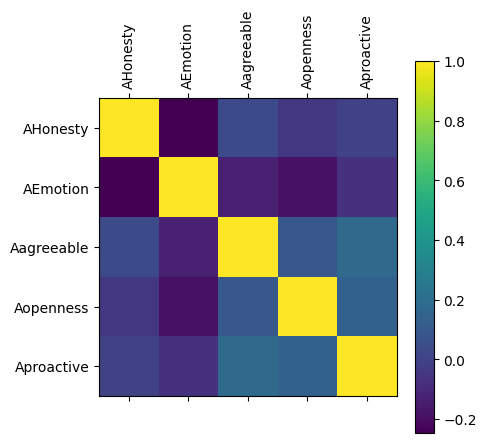

Confusion matrix:
 [[20 14]
 [29 92]]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# specify the file path of the downloaded dataset file
file_path = "/content/Raw material.xlsx"

# read the xlsx file as a dataframe
df = pd.read_excel(file_path)

# drop the unwanted columns
df = df.drop(['Honesty1', 'Honesty2', 'Honesty3', 'Honesty4', 'Honesty5', 'Honesty6', 'Honesty7', 'Honesty8', 'Honesty9', 
              'Emotion1', 'Emotion2', 'Emotion3', 'Emotion4', 'Emotion5', 'Emotion6', 'Emotion8', 'Emotion10', 
              'Extraver2', 'Extraver3', 'Extraver4', 'Extraver5', 'Extraver6', 'Extraver7', 'Extraver8', 'Extraver9', 'Extraver10', 
              'Agreeable1', 'Agreeable3', 'Agreeable4', 'Agreeable5', 'Agreeable7', 'Agreeable8', 'Agreeable9', 'Agreeable10', 
              'Conscientious1', 'Conscientious3', 'Conscientious4', 'Conscientious6', 'Conscientious7', 'Conscientious8', 'Conscientious9', 'Conscientious10', 
              'Openness1', 'Openness2', 'Openness3', 'Openness5', 'Openness7', 'Openness8', 'Openness9', 'Openness10',
              'Clarity1', 'Clarity2', 'Clarity3', 'Clarity4', 
              'Size1', 'Size2', 'Size3', 'Size4', 
              'Strength1', 'Strength2', 'Strength3', 
              'Comfort1', 'Comfort2', 'Comfort3', 'Comfort5', 'Comfort6', 'Comfort8', 
              'Proactive1', 'Proactive3', 'Proactive4', 'Proactive5', 'Proactive6', 'Proactive7', 'Proactive8', 'Proactive9', 'Proactive10', 
              'Behavior1', 'Behavior2', 'Behavior3', 'Behavior5', 'Behavior7', 'Behavior8', 'Behavior9', 
              'Interview1', 'Interview2', 
              'Offer1', 'Offer2', 'Aoffer'], axis=1)

# perform feature ranking using RFE
X = df.drop(columns=['Classification'])
y = df['Classification']
model = DecisionTreeClassifier()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

# select the top 5 features with the highest ranking
selected_features = X.columns[rfe.support_]
X_new = X[selected_features]

# create a correlation matrix for the selected features
corr_matrix = X_new.corr()
plt.matshow(corr_matrix)
plt.xticks(range(len(selected_features)), selected_features, rotation=90)
plt.yticks(range(len(selected_features)), selected_features)
plt.colorbar()
plt.show()

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)

# train the decision tree classifier model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# make predictions on the testing set
predictions = model.predict(X_test)

# create a confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion matrix:\n", cm)


SCATTERPLOT MATRIX (top 5 features)

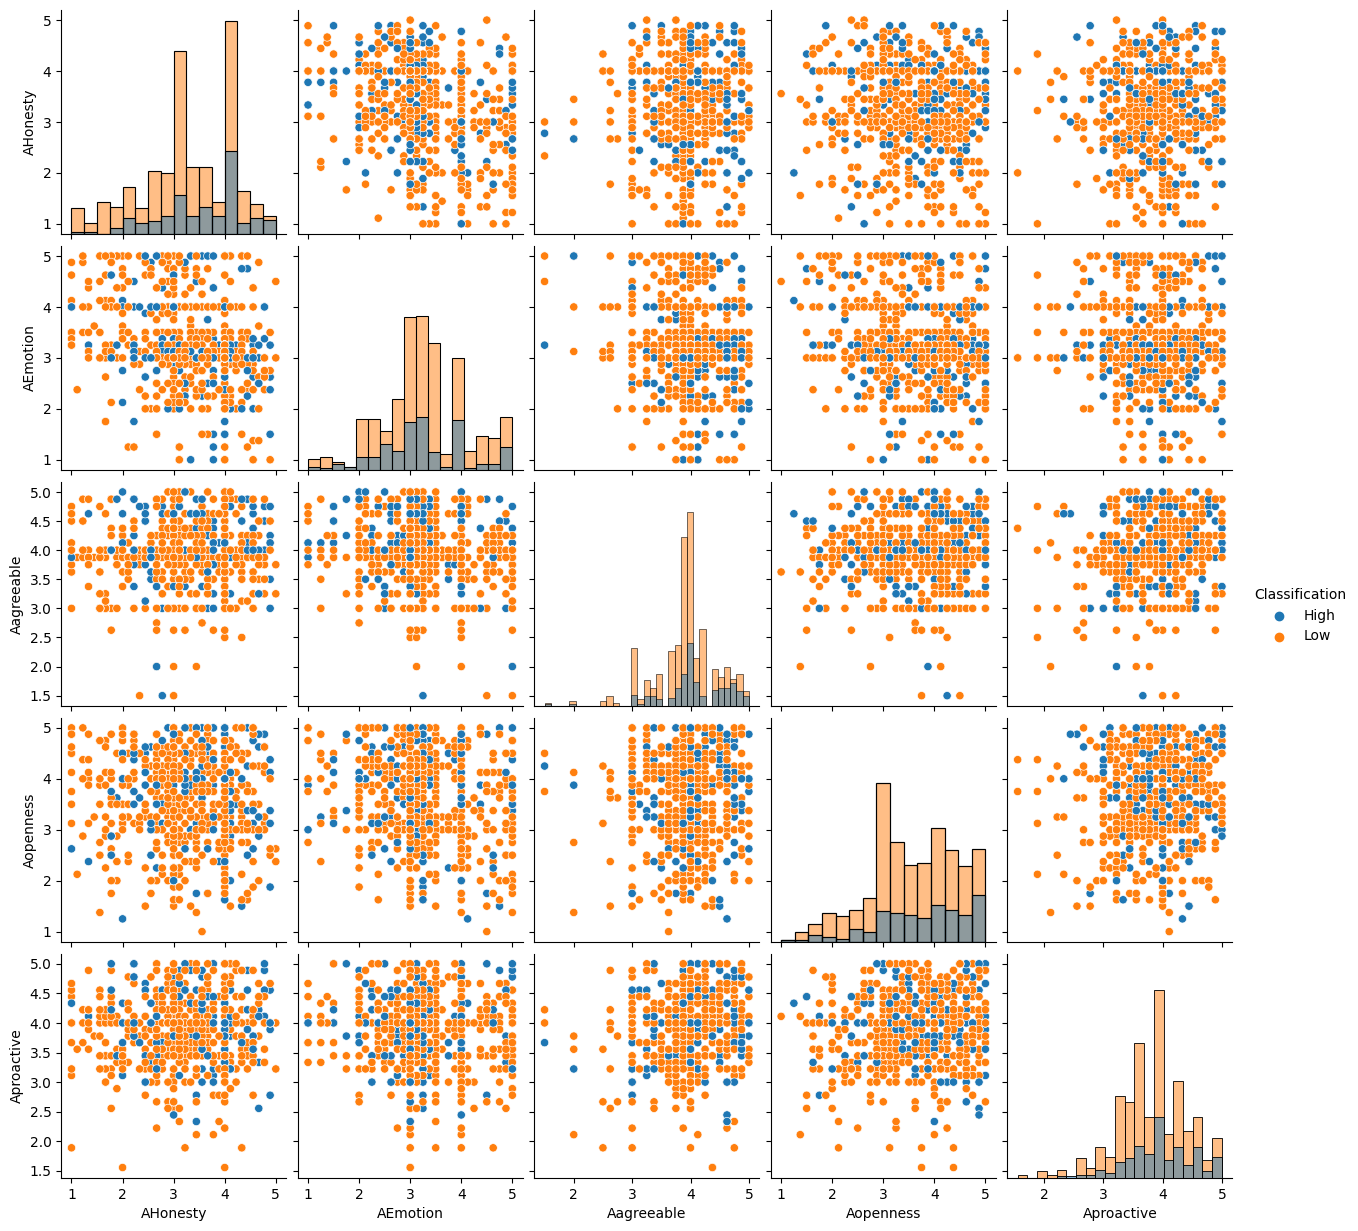

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE

# dataset into a dataframe
df = pd.read_excel('/content/Raw material.xlsx')

# drop the unwanted columns
df = df.drop(['Honesty1', 'Honesty2', 'Honesty3', 'Honesty4', 'Honesty5', 'Honesty6', 'Honesty7', 'Honesty8', 'Honesty9', 
              'Emotion1', 'Emotion2', 'Emotion3', 'Emotion4', 'Emotion5', 'Emotion6', 'Emotion8', 'Emotion10', 
              'Extraver2', 'Extraver3', 'Extraver4', 'Extraver5', 'Extraver6', 'Extraver7', 'Extraver8', 'Extraver9', 'Extraver10', 
              'Agreeable1', 'Agreeable3', 'Agreeable4', 'Agreeable5', 'Agreeable7', 'Agreeable8', 'Agreeable9', 'Agreeable10', 
              'Conscientious1', 'Conscientious3', 'Conscientious4', 'Conscientious6', 'Conscientious7', 'Conscientious8', 'Conscientious9', 'Conscientious10', 
              'Openness1', 'Openness2', 'Openness3', 'Openness5', 'Openness7', 'Openness8', 'Openness9', 'Openness10',
              'Clarity1', 'Clarity2', 'Clarity3', 'Clarity4', 
              'Size1', 'Size2', 'Size3', 'Size4', 
              'Strength1', 'Strength2', 'Strength3', 
              'Comfort1', 'Comfort2', 'Comfort3', 'Comfort5', 'Comfort6', 'Comfort8', 
              'Proactive1', 'Proactive3', 'Proactive4', 'Proactive5', 'Proactive6', 'Proactive7', 'Proactive8', 'Proactive9', 'Proactive10', 
              'Behavior1', 'Behavior2', 'Behavior3', 'Behavior5', 'Behavior7', 'Behavior8', 'Behavior9', 
              'Interview1', 'Interview2', 
              'Offer1', 'Offer2', 'Aoffer'], axis=1)

# perform feature ranking using RFE
X = df.drop(columns=['Classification'])
y = df['Classification']
model = DecisionTreeClassifier()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

# select the top 5 features with the highest ranking
selected_features = X.columns[rfe.support_]
df_new = df.loc[:, selected_features.append(pd.Index(['Classification']))]

# create a scatter plot matrix using the top 5 features
sns.pairplot(df_new, hue='Classification', diag_kind='hist')

# show the plot
plt.show()
